c:\Users\TweedleDee\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


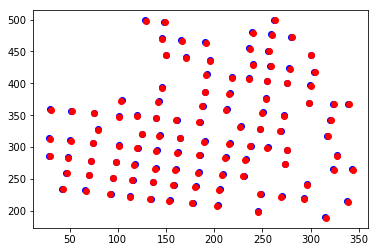

c:\Users\TweedleDee\Anaconda3\lib\site-packages\scipy\interpolate\fitpack2.py:1112: UserWarning: 
The coefficients of the spline returned have been computed as the
minimal norm least-squares solution of a (numerically) rank deficient
system (deficiency=9). If deficiency is large, the results may be
inaccurate. Deficiency may strongly depend on the value of eps.
  warnings.warn(message)


324.0 264.0 323.0 265.0 323.4549589470414 264.9831301107342
120.0 298.0 121.0 299.0 120.49484462739925 298.863076626274
115.0 248.0 116.0 249.0 115.46434999360066 248.77495807541834
125.0 320.0 125.0 321.0 125.62728645600902 320.8973141647137
161.0 291.0 162.0 292.0 161.9581883185451 291.9526292996181
48.0 283.0 48.0 284.0 47.328998705831204 283.45886178247656
113.0 222.0 113.0 223.0 113.63233819912391 222.68061397017186
183.0 260.0 184.0 261.0 184.1060543127834 260.97843967338775
140.0 294.0 141.0 295.0 140.75000154936927 294.9103623943494
43.0 235.0 42.0 235.0 41.85705925893627 235.30720660701272
189.0 308.0 190.0 309.0 190.0880481712239 309.0048867459452
117.0 272.0 118.0 273.0 117.4614945723243 272.82002220273074
101.0 302.0 101.0 303.0 101.28789284261343 302.8173077340942
74.0 306.0 74.0 307.0 73.82830319548043 306.75573303773604
208.0 257.0 209.0 258.0 209.13734823999766 257.99866252967917
328.0 286.0 327.0 287.0 327.240723323357 286.9436534471404
143.0 318.0 144.0 319.0 143.7740

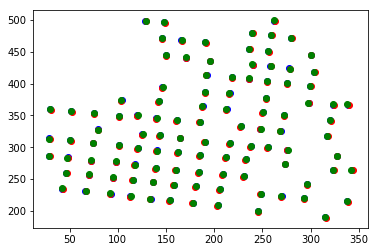

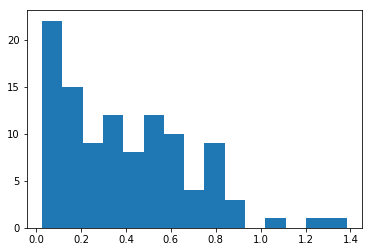

In [11]:
import sys
import argparse

import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import xlrd
from Mapping import *

def main():
    '''Main function docstring'''
    from scipy.io import loadmat
    
    # Load coordinates
    left_matfile = 'C:/Users/TweedleDee/Desktop/left.mat'
    right_matfile = 'C:/Users/TweedleDee/Desktop/right.mat'
    
    left_data = loadmat(left_matfile,struct_as_record = False, squeeze_me = True)
    right_data = loadmat(right_matfile,struct_as_record = False, squeeze_me = True)
    
    left_coords = np.array([left_data['X'], left_data['Y']])
    right_coords = np.array([right_data['X'], right_data['Y']])
    left_right_coords = np.array([left_coords, right_coords])
    
    shp = left_right_coords.shape    
    left_right_coords_final = left_right_coords.reshape(4,shp[2])

    
    # Find pairs of points and sort
    radius = 1.5
    pairs = findpairs(left_right_coords_final, radius)
    reshaped_pairs = np.reshape(pairs,(pairs.shape[0]/4,4))
    
    xl = reshaped_pairs[:,0]
    yl = reshaped_pairs[:,1]
    xr = reshaped_pairs[:,2]
    yr = reshaped_pairs[:,3]   

    # Plot original channels
    plt.plot(xr, yr, 'bo')
    plt.plot(xl, yl, 'ro')
    plt.show()
    
    # Perform mapping 
    reg_dev = np.array([])
    xr_mapped = []
    yr_mapped = []
    
    for i in range(0, reshaped_pairs.shape[0]):
        # Save a point in the grid in both channels
        xl_p = xl[i]
        yl_p = yl[i]
        xr_p = xr[i]
        yr_p = yr[i]
                   
        # Save the rest of the points
        xl_n = np.concatenate((xl[:i], xl[i+1:]),axis=0)
        yl_n = np.concatenate((yl[:i], yl[i+1:]),axis=0)
        xr_n = np.concatenate((xr[:i], xr[i+1:]),axis=0)
        yr_n = np.concatenate((yr[:i], yr[i+1:]),axis=0)

        # Generate the mapping  
        n = 1
        mapping = makeLSQSpline( xl_n, yl_n, xr_n, yr_n, n)
        xr_map, yr_map = mapping(xl_p, yl_p)
        xr_mapped.append(xr_map)
        yr_mapped.append(yr_map)
        
        # Calculate target registration error
        RMSD = np.sqrt((xr_map - xr_p)**2 + (yr_map - yr_p)**2)     
        reg_dev = np.append(reg_dev,RMSD)
        print(xl_p, yl_p,xr_p,yr_p,xr_map,yr_map)
                
    mu = np.mean(reg_dev)
    med = np.median(reg_dev)
    sigma = np.std(reg_dev)
    
    # Plot registration mapping
    plt.plot(xr, yr, 'bo')
    plt.plot(xl, yl, 'ro')
    plt.plot(xr_mapped, yr_mapped, 'go')
    plt.show()
    
    # Plot registration error histogram
    plt.hist(reg_dev,bins = 15)
    plt.show()
                   
if __name__ == '__main__':
    main()